# EDA

##### Authors (Code): Mateus and Mughees
##### Authors (Comments): Cody
##### Step 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from creditcard_preparation import load_creditcard_data

In [2]:
df = load_creditcard_data(drop_id=False)

# Turn off truncation to view all columns (change second parameter to set limit)
pd.set_option('display.max_columns', None)

# What does the dataset look like?

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Takeaways from Kaggle information and above:

<ul>

<li> A row represents one credit card transaction from 2023</li>
<li> Columns V1-V28 contain anonymized attribute about a transaction (time, location, etc.) </li>
<li> Only data that is not anonymized is: </li>
<ul>
<li> Transaction ID </li>
<li> Transaction Amount </li>
<li> Transaction Class (a binary attribute: 1 = fradulent transaction; 0 = not fradulent)</li>
</ul>

<li> Anonymized attributes seem to have already been scaled or standardized </li>
<li> Because attributes are anonymized, the only reasonable approach for combining attributes would be to form a grid of all possible combinations (a grid of size 32x32) and choose the best (may be done eventually if algorithm metrics need significant improvement) </li>
<li> Transaction amount appears to likely be in USD ($) </li>

</ul>

# Row & Column Count, Null Entry Count, and Data Types

In [4]:
#See number of rows and columns
df.shape

(568630, 31)

In [5]:
#See info about column names, non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<ul>
<li> 568,629 Rows </li>
<li>31 Columns </li>
<li> 28 columns with anonymized data; 2 with original data </li>
<li> Appears that there are no null values in any column </li>
<br>
<li> All columns contain numerical data </li>
<ul>
<li> Anonymized columns & the "amount" column has floating point data </li>
<li> "ID" and "Class" columns have integer data </li>
</ul>

In [6]:
#Verify that no columns have null values
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

When the above cell is viewed as a scrollable element, it is confirmed that there are no null values in the dataset

# Statistics

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# Suppress scientific notation
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000
mean,284314.50000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,12041.95763,0.50000
std,164149.48612,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,6919.64445,0.50000
min,0.00000,-3.49558,-49.96657,-3.18376,-4.95122,-9.95279,-21.11111,-4.35184,-10.75634,-3.75192,-3.16328,-5.95472,-2.02040,-5.95523,-2.10742,-3.86181,-2.21451,-2.48494,-2.42195,-7.80499,-78.14784,-19.38252,-7.73480,-30.29545,-4.06797,-13.61263,-8.22697,-10.49863,-39.03524,50.01000,0.00000
25%,142157.25000,-0.56529,-0.48668,-0.64930,-0.65602,-0.29350,-0.44587,-0.28353,-0.19226,-0.56874,-0.59010,-0.70145,-0.83113,-0.69667,-0.87321,-0.62125,-0.71627,-0.61949,-0.55605,-0.56531,-0.35024,-0.16644,-0.49049,-0.23763,-0.65158,-0.55415,-0.63189,-0.30496,-0.23188,6054.89250,0.00000
50%,284314.50000,-0.09364,-0.13589,0.00035,-0.07376,0.08109,0.07872,0.23337,-0.11452,0.09253,0.26261,-0.04105,0.16205,0.01761,0.23050,-0.03926,0.13403,0.27164,0.08729,-0.02598,-0.12338,-0.03743,-0.02733,-0.05969,0.01590,-0.00819,-0.01189,-0.17291,-0.01393,12030.15000,0.50000
75%,426471.75000,0.83266,0.34356,0.62854,0.70700,0.43974,0.49779,0.52595,0.04730,0.55926,0.59246,0.74777,0.74467,0.68560,0.75182,0.66541,0.65561,0.51822,0.54439,0.56012,0.24822,0.14798,0.46388,0.15572,0.70074,0.55001,0.67289,0.33402,0.40959,18036.33000,1.00000
max,568629.00000,2.22905,4.36187,14.12583,3.20154,42.71689,26.16840,217.87304,5.95804,20.27006,31.72271,2.51357,17.91356,7.18749,19.16954,14.53220,46.65291,6.99412,6.78372,3.83167,29.87281,8.08708,12.63251,31.70763,12.96564,14.62151,5.62329,113.23109,77.25594,24039.93000,1.00000


* All anonymized attributes have a mean of 0, which means that the data seems to have already been standardized (standardized around 0)
* Above assumption further evidenced by all anonymized columns having a standard deviation of 1

Some columns have a smaller range, including:

* V1 (-3 to 2)
* V11 (-5 to 2)
* V4 (-5 to 3)
* V18 (-2 to 6)
* V17 (-2 to 7)


While others have a wider range, including:

* V23 (-30 to 31)
* V20 (-7 to 29)
* V28 (-39 to 77)
* V27 (-10 to 113)
* V7 (-4 to 217)

<br>
* Many anonymized attributes (18/28) have a range under 30
<br>

* Amount column has a very large standard deviation (almost 7000) and wide range (50 to 24,039)
* Wide variety of transactions present in regards to transaction amount (very small \$ to very large \$ credit card transactions)


# Distributions

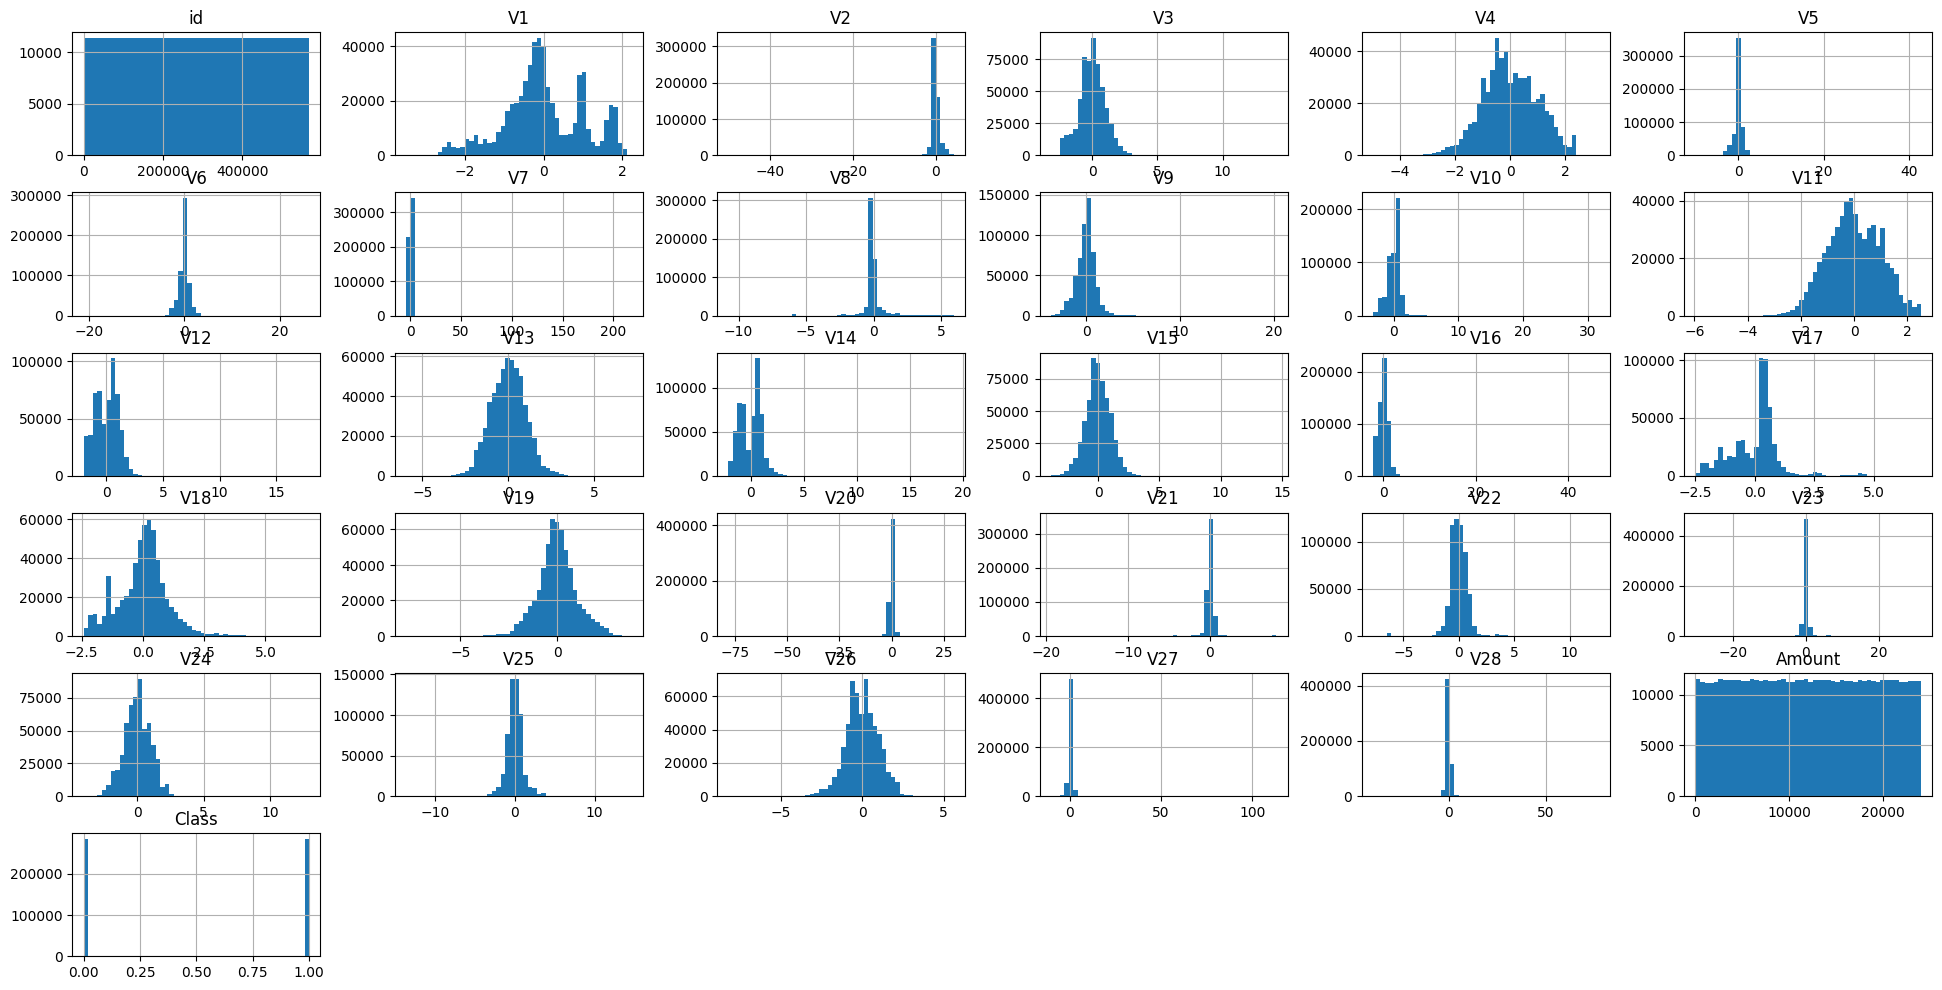

In [9]:
# View distributions of all columns
df.hist(bins=50, figsize=(24, 12))
plt.show()

Almost all anonymized columns appear to have a normal distribution, except for:

* V7
* V11 (?)
* V12
* V14
* V17 (?)

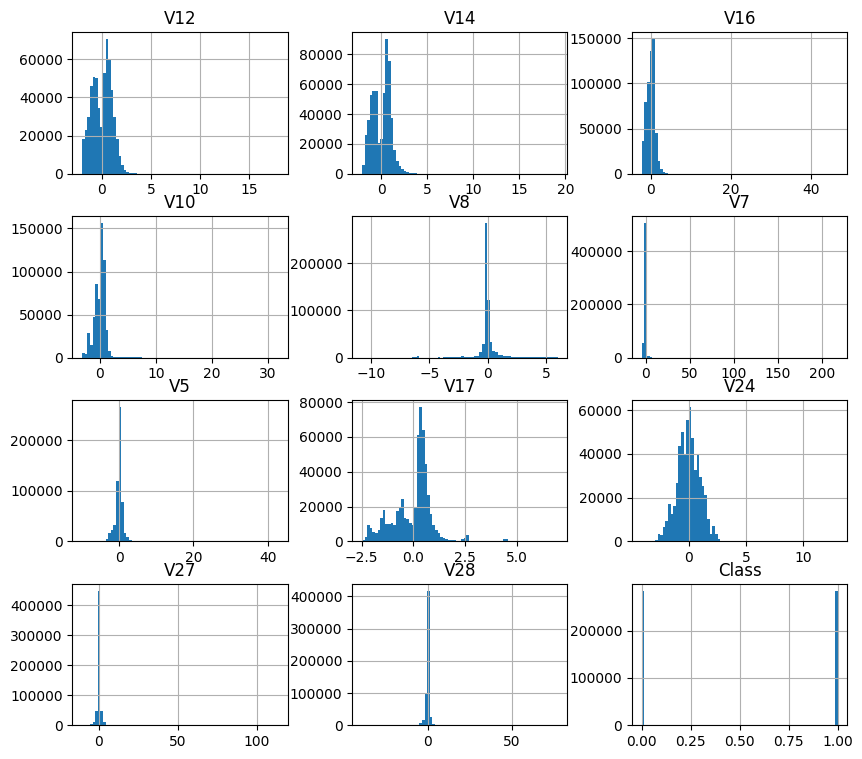

In [10]:
# Point of this?
df[['V12','V14','V16','V10','V8', 'V7', 'V5', 'V17', 'V24', 'V27', 'V28', 'Class']].hist(bins=75, figsize=(10, 9))
plt.show()

Some attributes (especially V17) may need to be transformed using log function to improve model performance

# Correlations

In [11]:
correlation_matrix = df.corr()

# Display the full correlation matrix
correlation_matrix

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,-0.578014,0.589321,-0.652940,-0.076331,-0.709346,-0.080004,-0.494255,-0.417226,-0.341056,0.216276,0.145803,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,-0.525797,0.580715,-0.020567,0.494427,0.046002,0.621884,0.605799,0.577296,-0.377803,-0.219164,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,0.558863,-0.574935,0.012801,-0.523294,-0.161325,-0.534392,-0.495836,-0.482162,0.208821,0.263707,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,-0.688436,0.705497,-0.019272,0.673179,0.098516,0.614504,0.578223,0.525509,-0.314396,-0.253805,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,0.708642,-0.722597,0.011519,-0.714847,-0.098627,-0.593948,-0.532786,-0.482267,0.269842,0.257236,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,-0.440100,0.473002,-0.115317,0.387454,0.058686,0.596898,0.669625,0.645095,-0.438118,-0.246694,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,-0.497611,0.498993,-0.117637,0.510123,-0.023851,0.415834,0.378152,0.328019,-0.235623,-0.188360,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,-0.587660,0.603318,-0.030000,0.535612,0.135939,0.667244,0.655755,0.625680,-0.372270,-0.299436,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,0.223052,-0.211999,0.273958,-0.216410,0.101690,-0.230638,-0.277246,-0.249986,0.253272,0.131354,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,-0.633556,0.667266,-0.006167,0.633212,0.114613,0.573957,0.581604,0.522720,-0.294432,-0.328975,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


<Axes: >

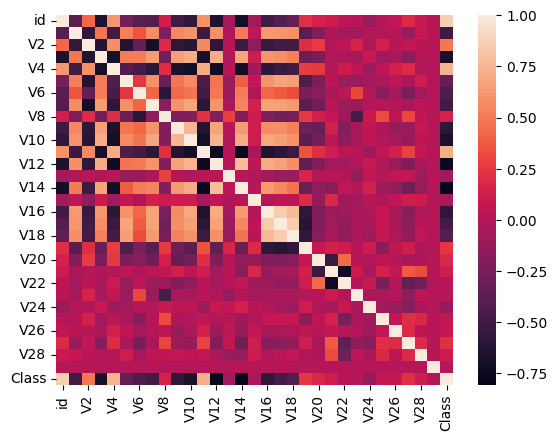

In [12]:
# Visualize all correlations as heatmap
sns.heatmap(df.corr())

In [13]:
# View correlations with target

corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64

Many columns (ignoring the superficial "id" column) have a strong positive correlation with classification (near or over 0.50), including:

* V4
* V11
* V2 (very close to 0.50)

<br>

Many columns also have a strong negative correlation with classification (near or less than 0.50), including:

* V1
* V16
* V9
* V10
* V3
* V12
* V14

<Axes: >

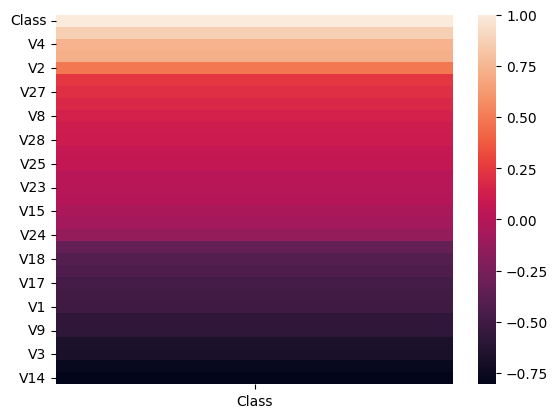

In [14]:
# View correlations with target as heatmap

sns.heatmap(corr_matrix['Class'].sort_values(ascending=False).to_frame())

# Categorical Data

In [15]:
# See class counts
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [16]:
class_counts = df['Class'].value_counts()
total_samples = len(df)
class_percentages = (class_counts / total_samples) * 100
print(class_percentages)

Class
0    50.0
1    50.0
Name: count, dtype: float64


The classifier column is the only categorical-like column. It has the same number of entries in each class.